In [1]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd 

import os 
import re
import nltk




In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset with labels using pandas
df = pd.read_csv('C:/Users/sidha/OneDrive/Desktop/Mp/Fake-News-Detection-/WebScrapping/political_fact_checker.csv')

# Split the dataset into training and testing sets, with 70% for training and 20% for testing
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Now, train_df contains the training data with labels,
# and test_df contains the testing data with labels


In [3]:
print(train_df.shape)

(3087, 8)


In [4]:
print(test_df.shape)

(1323, 8)


In [5]:
print(train_df.isnull().sum())
print("---------------------------")
print(test_df.isnull().sum())


Unnamed: 0         0
author             0
statement          0
source             0
date               0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64
---------------------------
Unnamed: 0         0
author             0
statement          0
source             0
date               0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64


In [6]:
train_df.head()

,Unnamed: 0,author,statement,source,date,target,BinaryTarget,BinaryNumTarget
500,500,Amy,Herschel Walker “is heavily funded by the oil ...,League of Conservation Voters,"December 1, 2022",half-true,REAL,1
3043,3043,Louis,“Gas prices highest in a decade. Worst jobs re...,Facebook posts,"May 26, 2021",barely-true,FAKE,0
2633,2633,Ciara,Video shows “pupils in Nigeria running away fr...,Facebook posts,"August 27, 2021",false,FAKE,0
549,549,Jeff,U.S. tax dollars sent to help Ukraine were lau...,Instagram posts,"November 15, 2022",false,FAKE,0
557,557,Ciara,A New York election results map is evidence of...,Viral image,"November 11, 2022",false,FAKE,0


In [7]:
test_df.head()

,Unnamed: 0,author,statement,source,date,target,BinaryTarget,BinaryNumTarget
1413,1413,Monique,"""In Iran, if a 12-year-old girl is raped and i...",Instagram posts,"May 19, 2022",false,FAKE,0
3352,3352,Paul,"""Illegal border crossings are up 173% from 1 y...",Richard Hudson,"March 25, 2021",half-true,REAL,1
3970,3970,Daniel,Siri gave “CONFIRMATION of the Democrats' sini...,Facebook posts,"November 10, 2020",pants-fire,FAKE,0
3629,3629,Ciara,"H&M advertised a sweatshirt that said, “Kooles...",Viral image,"February 2, 2021",false,FAKE,0
144,144,Amy,"Democrats ""want to ban gas powered cars and ga...",Nikki Haley,"March 13, 2023",half-true,REAL,1


In [8]:
test_df=test_df.fillna(' ')
train_df=train_df.fillna(' ')
test_df['total']=test_df['author']+' '+test_df['statement']+test_df['source']+test_df['date']
train_df['total']=train_df['author']+' '+train_df['statement']+train_df['source']+train_df['date']


Creating Wordcloud Visuals

In [9]:
real_words=''
fake_words=''
stopwords= set(STOPWORDS)

#iterate through csv file
for val in train_df[train_df['BinaryNumTarget']==1].total:
    #split the value 
    tokens = val.split()

    #converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()

    real_words+=" ".join(tokens)+" "

for val in train_df[train_df['BinaryNumTarget']==0].total:
    #split the value 
    tokens = val.split()

    #converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()

    fake_words+=" ".join(tokens)+" "

    

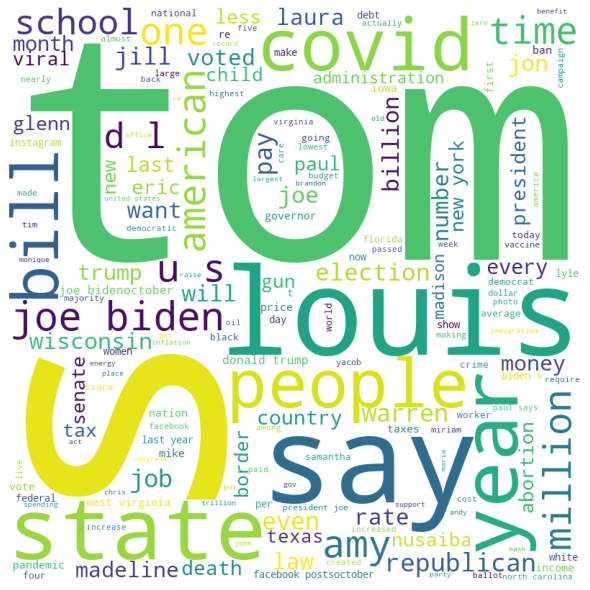

In [10]:
wordcloud = WordCloud(width= 800 , height = 800,
                      background_color='white', 
                      stopwords=stopwords,
                      min_font_size=10).generate(real_words)

#plot the WordCloud image
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

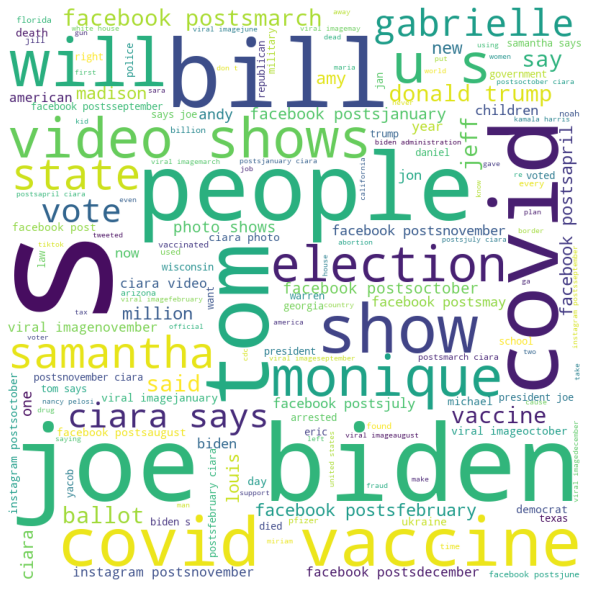

In [11]:
wordcloud = WordCloud(width= 800 , height = 800,
                      background_color='white', 
                      stopwords=stopwords,
                      min_font_size=10).generate(fake_words)

#plot the WordCloud image
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

Cleaning and preprocessing

1.Regex

In [12]:
#Remove punctuations from the String

s="!</> hello please$$ </>^s!!!u%%bs&&%$cri@@@be^^^&&!& </>*to@# the&&\ cha@@@n##%^^&nel!@# %%$"

In [13]:
s = re.sub(r'[^\w\s]','',s)

In [14]:
print(s)

 hello please subscribe to the channel 


2. Tokenization

In [15]:
#Downloading nltk data
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sidha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# nltk.word_tokenize("Hello how are you")

def word_tokenize(sentence):
    # Define a list of punctuations
    punctuations = ['.', ',', ';', ':', '!', '?', '(', ')', '[', ']', '{', '}', '"', "'", '/', '\\', '-', '_', '+', '=', '@', '#', '$', '%', '&', '*', '^', '`', '~']

    # Replace all punctuations with a space
    for punctuation in punctuations:
        sentence = sentence.replace(punctuation, ' ')

    # Split the sentence by space to get words
    words = sentence.split()

    return words

# Input sentence
sentence = "Hello how are you"

# Call the word_tokenize function
words = word_tokenize(sentence)

# Print the tokenized words
print(words)


['Hello', 'how', 'are', 'you']


3.StopWords

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sidha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
sentence="Recession is a major risk to all the countries right now"

In [20]:
words = word_tokenize(sentence)
words = [w for w in words if w not in stop_words]
print(words)

['Recession', 'major', 'risk', 'countries', 'right']


4.Lemmatization

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

input_str="how could we ever just be friends"

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sidha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sidha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [24]:
#Tokenize the sentence
input_str=word_tokenize(input_str)

#Lemmatize each word
for word in input_str:
    print(lemmatizer.lemmatize(word))

how
could
we
ever
just
be
friend


In [25]:
lemmatizer=WordNetLemmatizer()
for index,row in train_df.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train_df.loc[index,'total'] = filter_sentence


In [26]:
train_df.head()

,Unnamed: 0,author,statement,source,date,target,BinaryTarget,BinaryNumTarget,total
500,500,Amy,Herschel Walker “is heavily funded by the oil ...,League of Conservation Voters,"December 1, 2022",half-true,REAL,1,amy herschel walker heavily funded oil gas in...
3043,3043,Louis,“Gas prices highest in a decade. Worst jobs re...,Facebook posts,"May 26, 2021",barely-true,FAKE,0,louis gas price highest decade worst job repo...
2633,2633,Ciara,Video shows “pupils in Nigeria running away fr...,Facebook posts,"August 27, 2021",false,FAKE,0,ciara video show pupil nigeria running away v...
549,549,Jeff,U.S. tax dollars sent to help Ukraine were lau...,Instagram posts,"November 15, 2022",false,FAKE,0,jeff us tax dollar sent help ukraine laundere...
557,557,Ciara,A New York election results map is evidence of...,Viral image,"November 11, 2022",false,FAKE,0,ciara a new york election result map evidence...


In [27]:
train_df = train_df[['total','BinaryNumTarget']]

In [28]:
train_df.head()

,total,BinaryNumTarget
500,amy herschel walker heavily funded oil gas in...,1
3043,louis gas price highest decade worst job repo...,0
2633,ciara video show pupil nigeria running away v...,0
549,jeff us tax dollar sent help ukraine laundere...,0
557,ciara a new york election result map evidence...,0


Applying NLP Techniques

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
X_train=train_df['total']
Y_train= train_df['BinaryNumTarget']

Bag of Words/ CountVectorizer

In [31]:
corpus = [
    'This is the first document',
    'This is the second document',
    'And this is the third one',
    'Is this the first document?'
]
vectorizer = CountVectorizer()
X= vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [32]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


TF-iDF Vectorizer

In [33]:
def vectorize_text(features,max_features):
    vectorizer = TfidfVectorizer(stop_words ='english',
                                 decode_error='strict',
                                 analyzer='word',
                                 ngram_range = (1,2),
                                 max_features=max_features
                                #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [34]:
tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30)

In [35]:
tfidf_features

array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

Applying to dataset

In [36]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [37]:
tf_idf_matrix.toarray().shape

(3087, 10583)

Modelling

In [38]:
test_counts = count_vectorizer.transform(test_df['total'].values)
test_tfidf=tfidf.transform(test_counts)

#split in samples

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(tf_idf_matrix,Y_train,random_state=0)

In [39]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random over-sampler
oversample = RandomOverSampler()

# Fit and transform the data
X_resampled, y_resampled = oversample.fit_resample(tf_idf_matrix, Y_train)


Logistic Regression

Accuracy: 0.907036797934151
Precision: 0.893167701863354
Recall: 0.9253539253539254
F1 Score: 0.9089759797724398


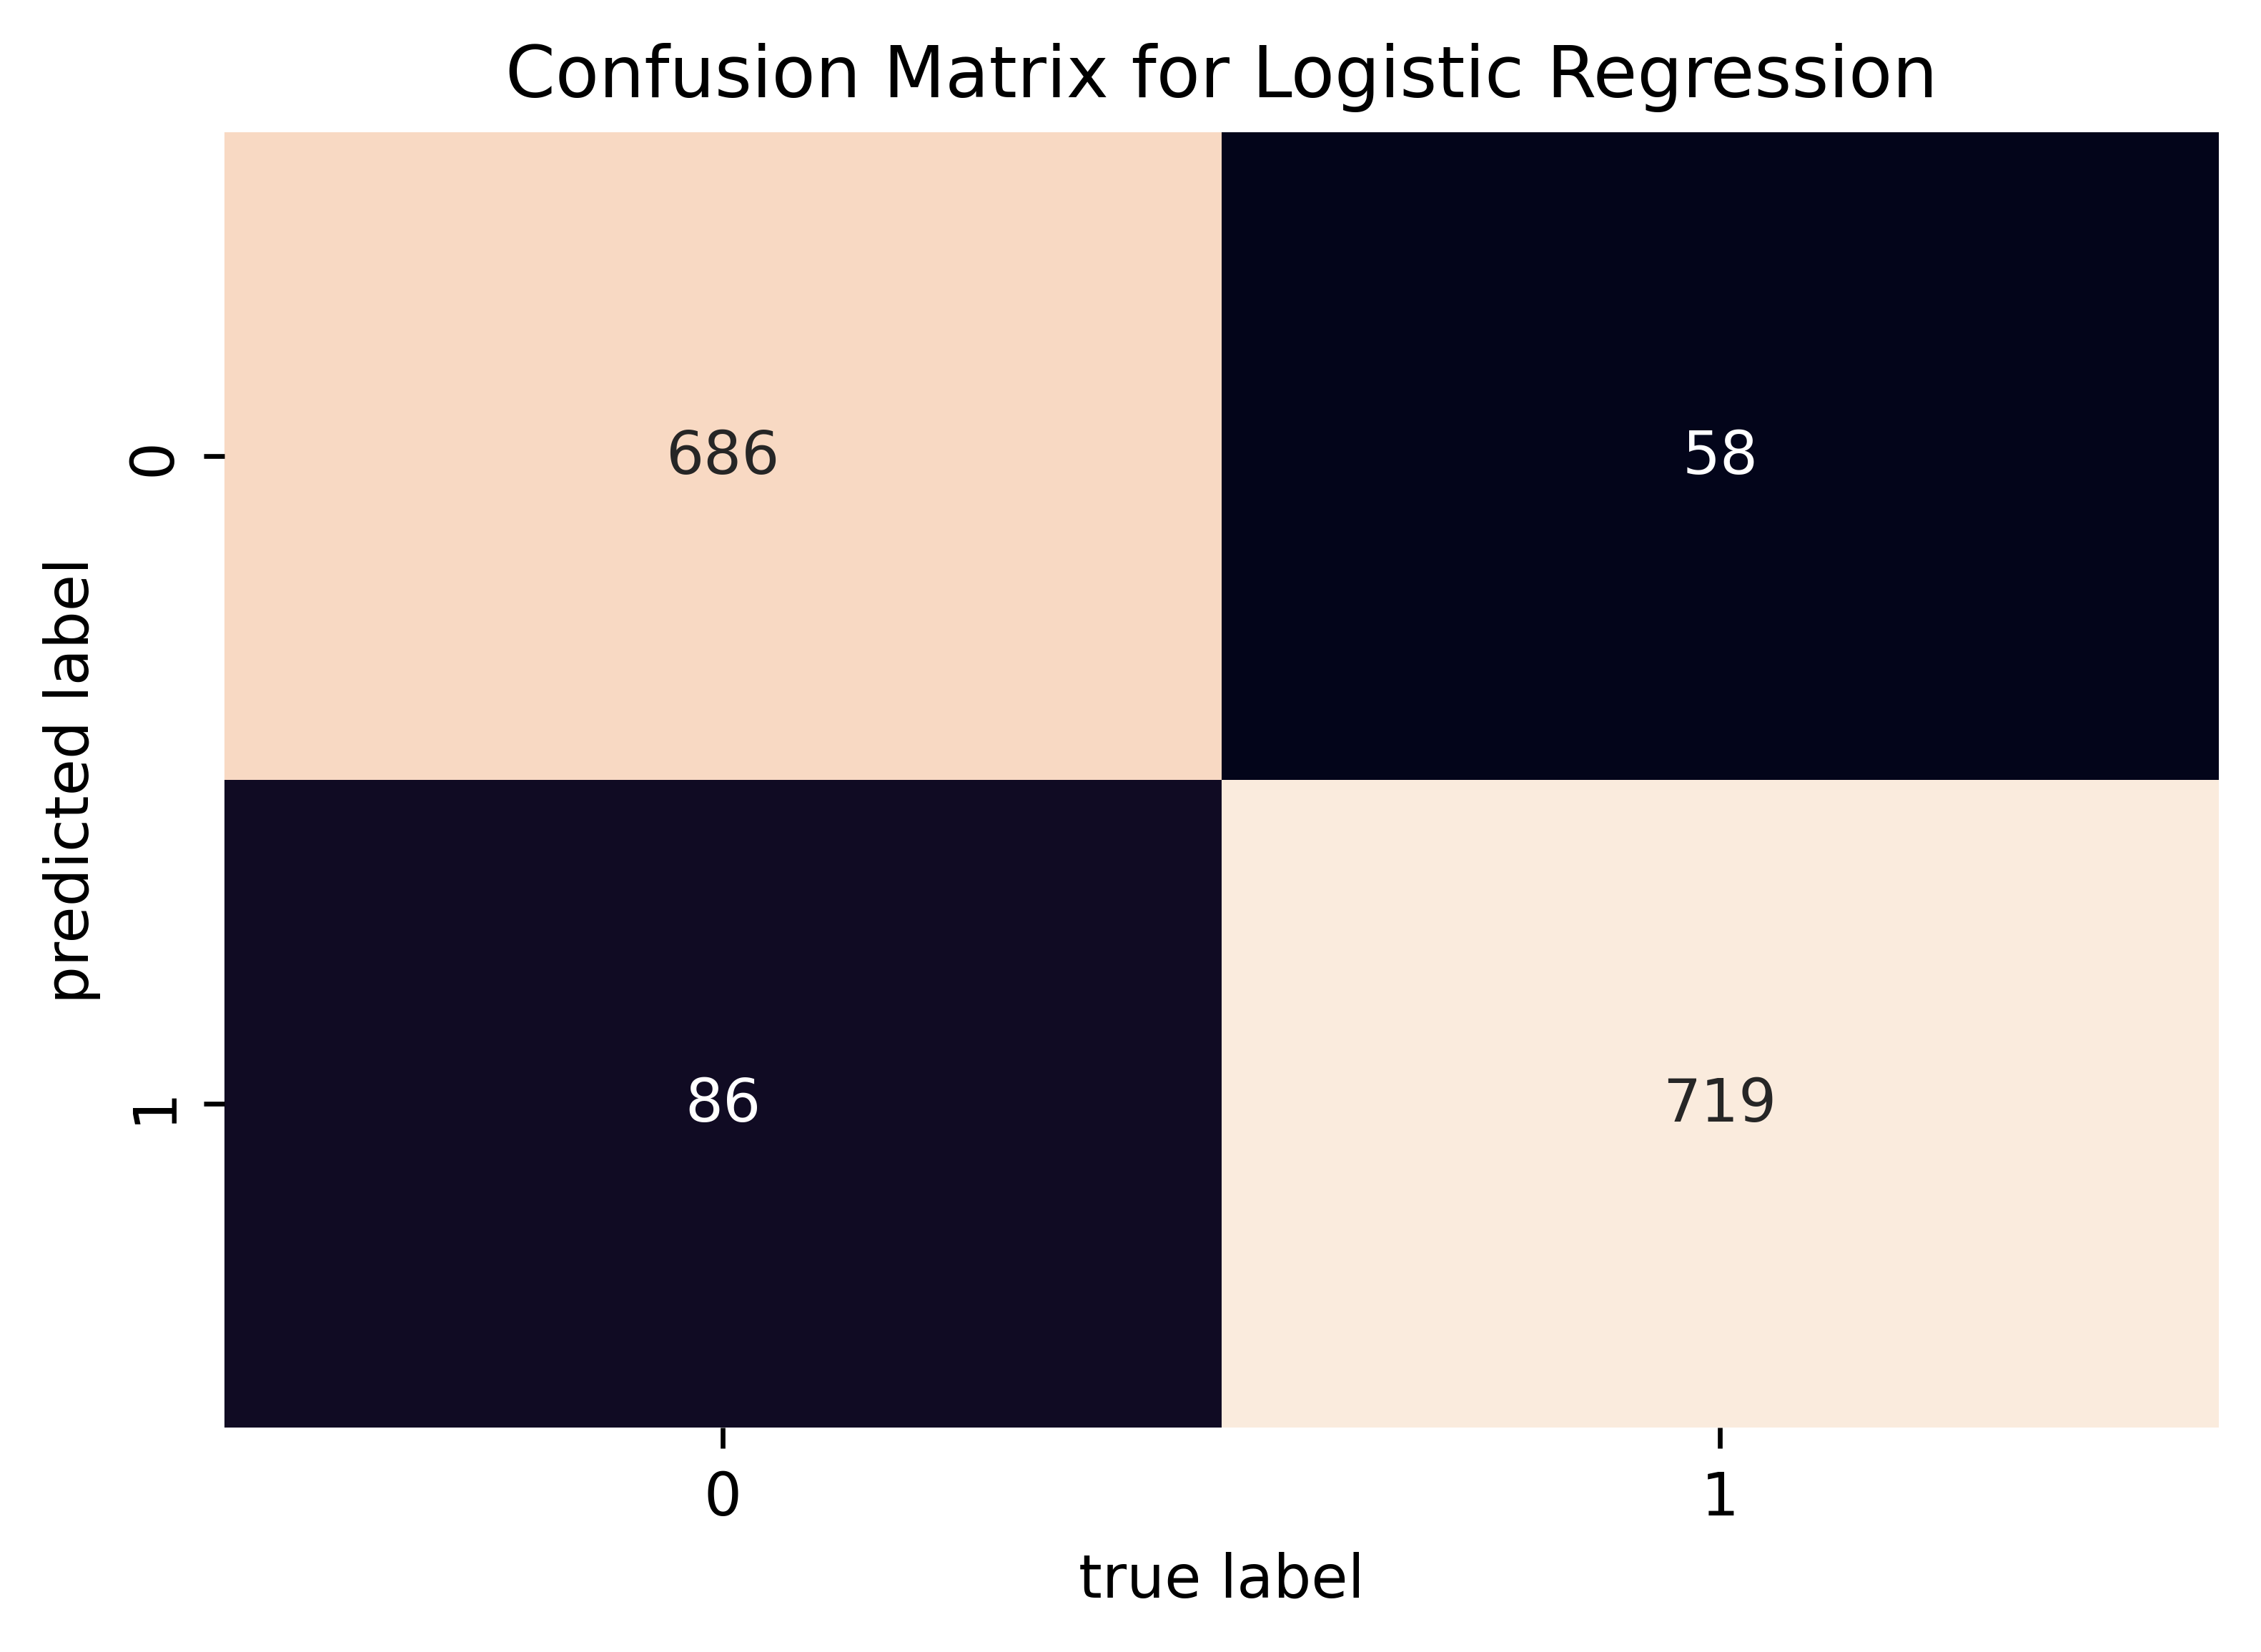

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1 Score: {}".format(f1))



plt.figure(dpi=600)
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix_logistic_regression.png")
plt.show()


Random Forest

Accuracy: 0.947062621045836
Precision: 0.9151732377538829
Recall: 0.9858429858429858
F1 Score: 0.9491945477075588


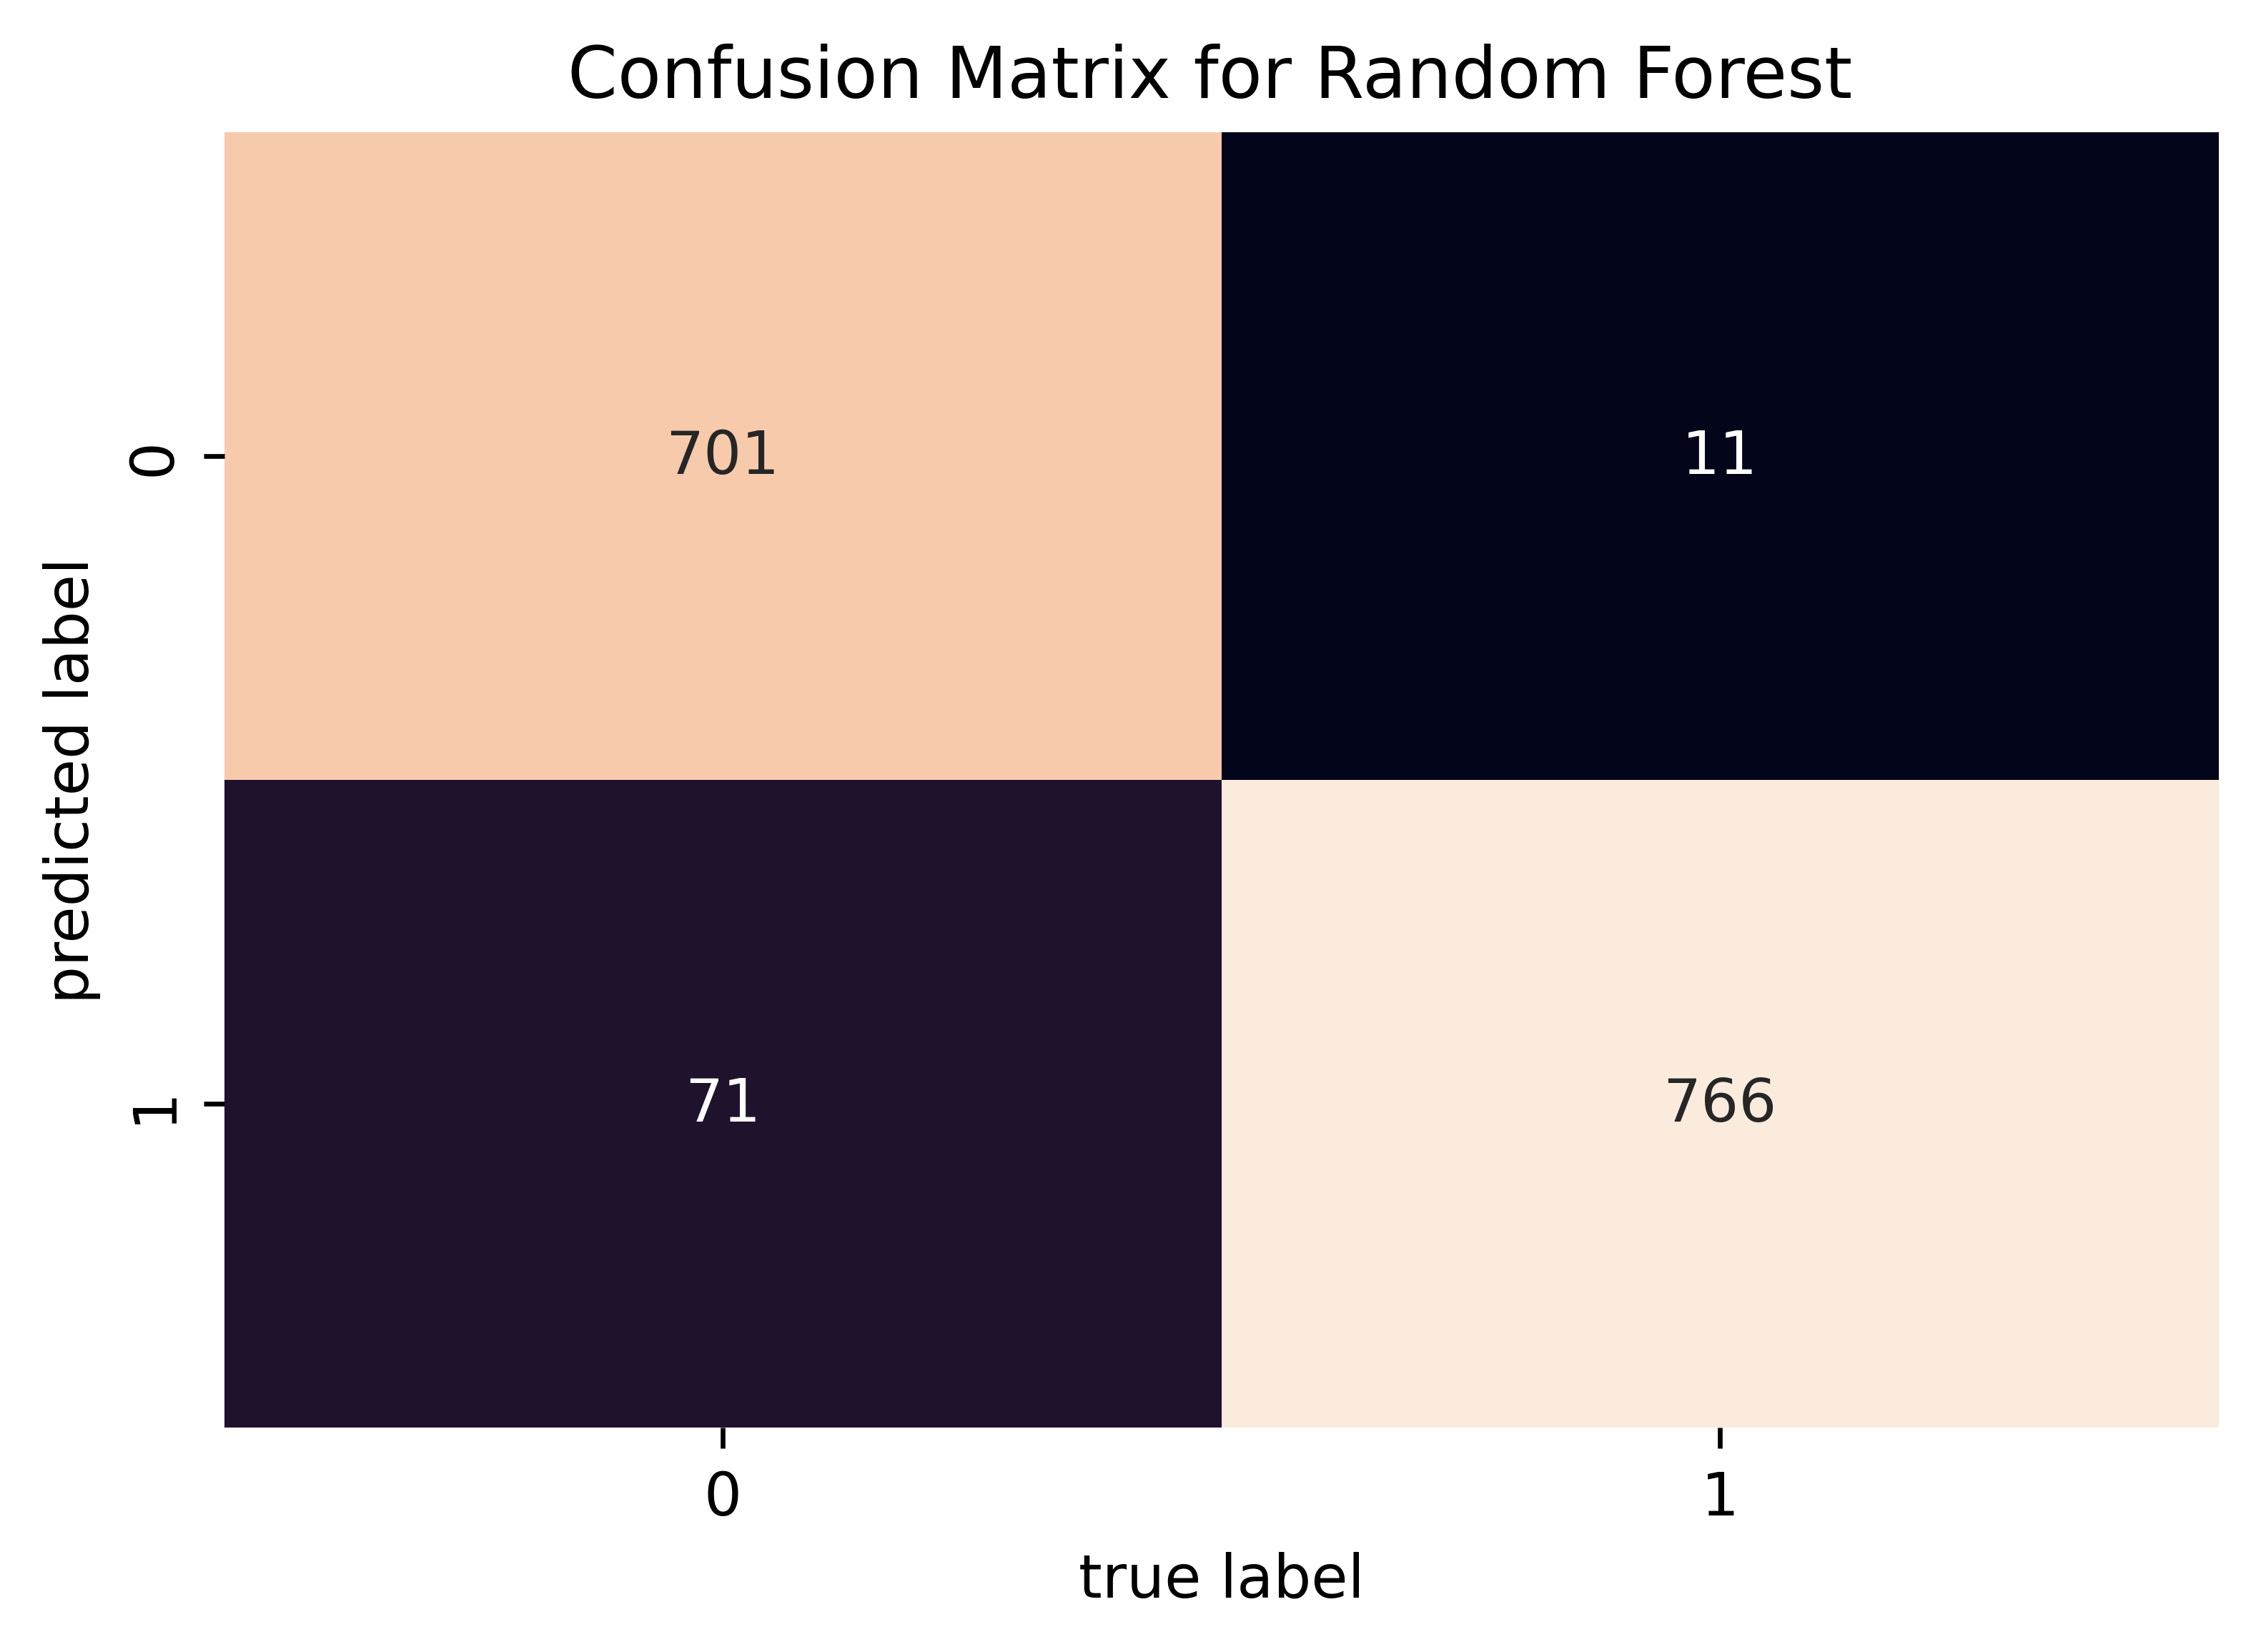

In [41]:

from sklearn.ensemble import RandomForestClassifier

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1 Score: {}".format(f1))




plt.figure(dpi=600)
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Random Forest ')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix_random_forest.png")
plt.show()



Naive Bayes

Accuracy: 0.921239509360878
Precision: 0.8786127167630058
Recall: 0.9781209781209781
F1 Score: 0.925700365408039


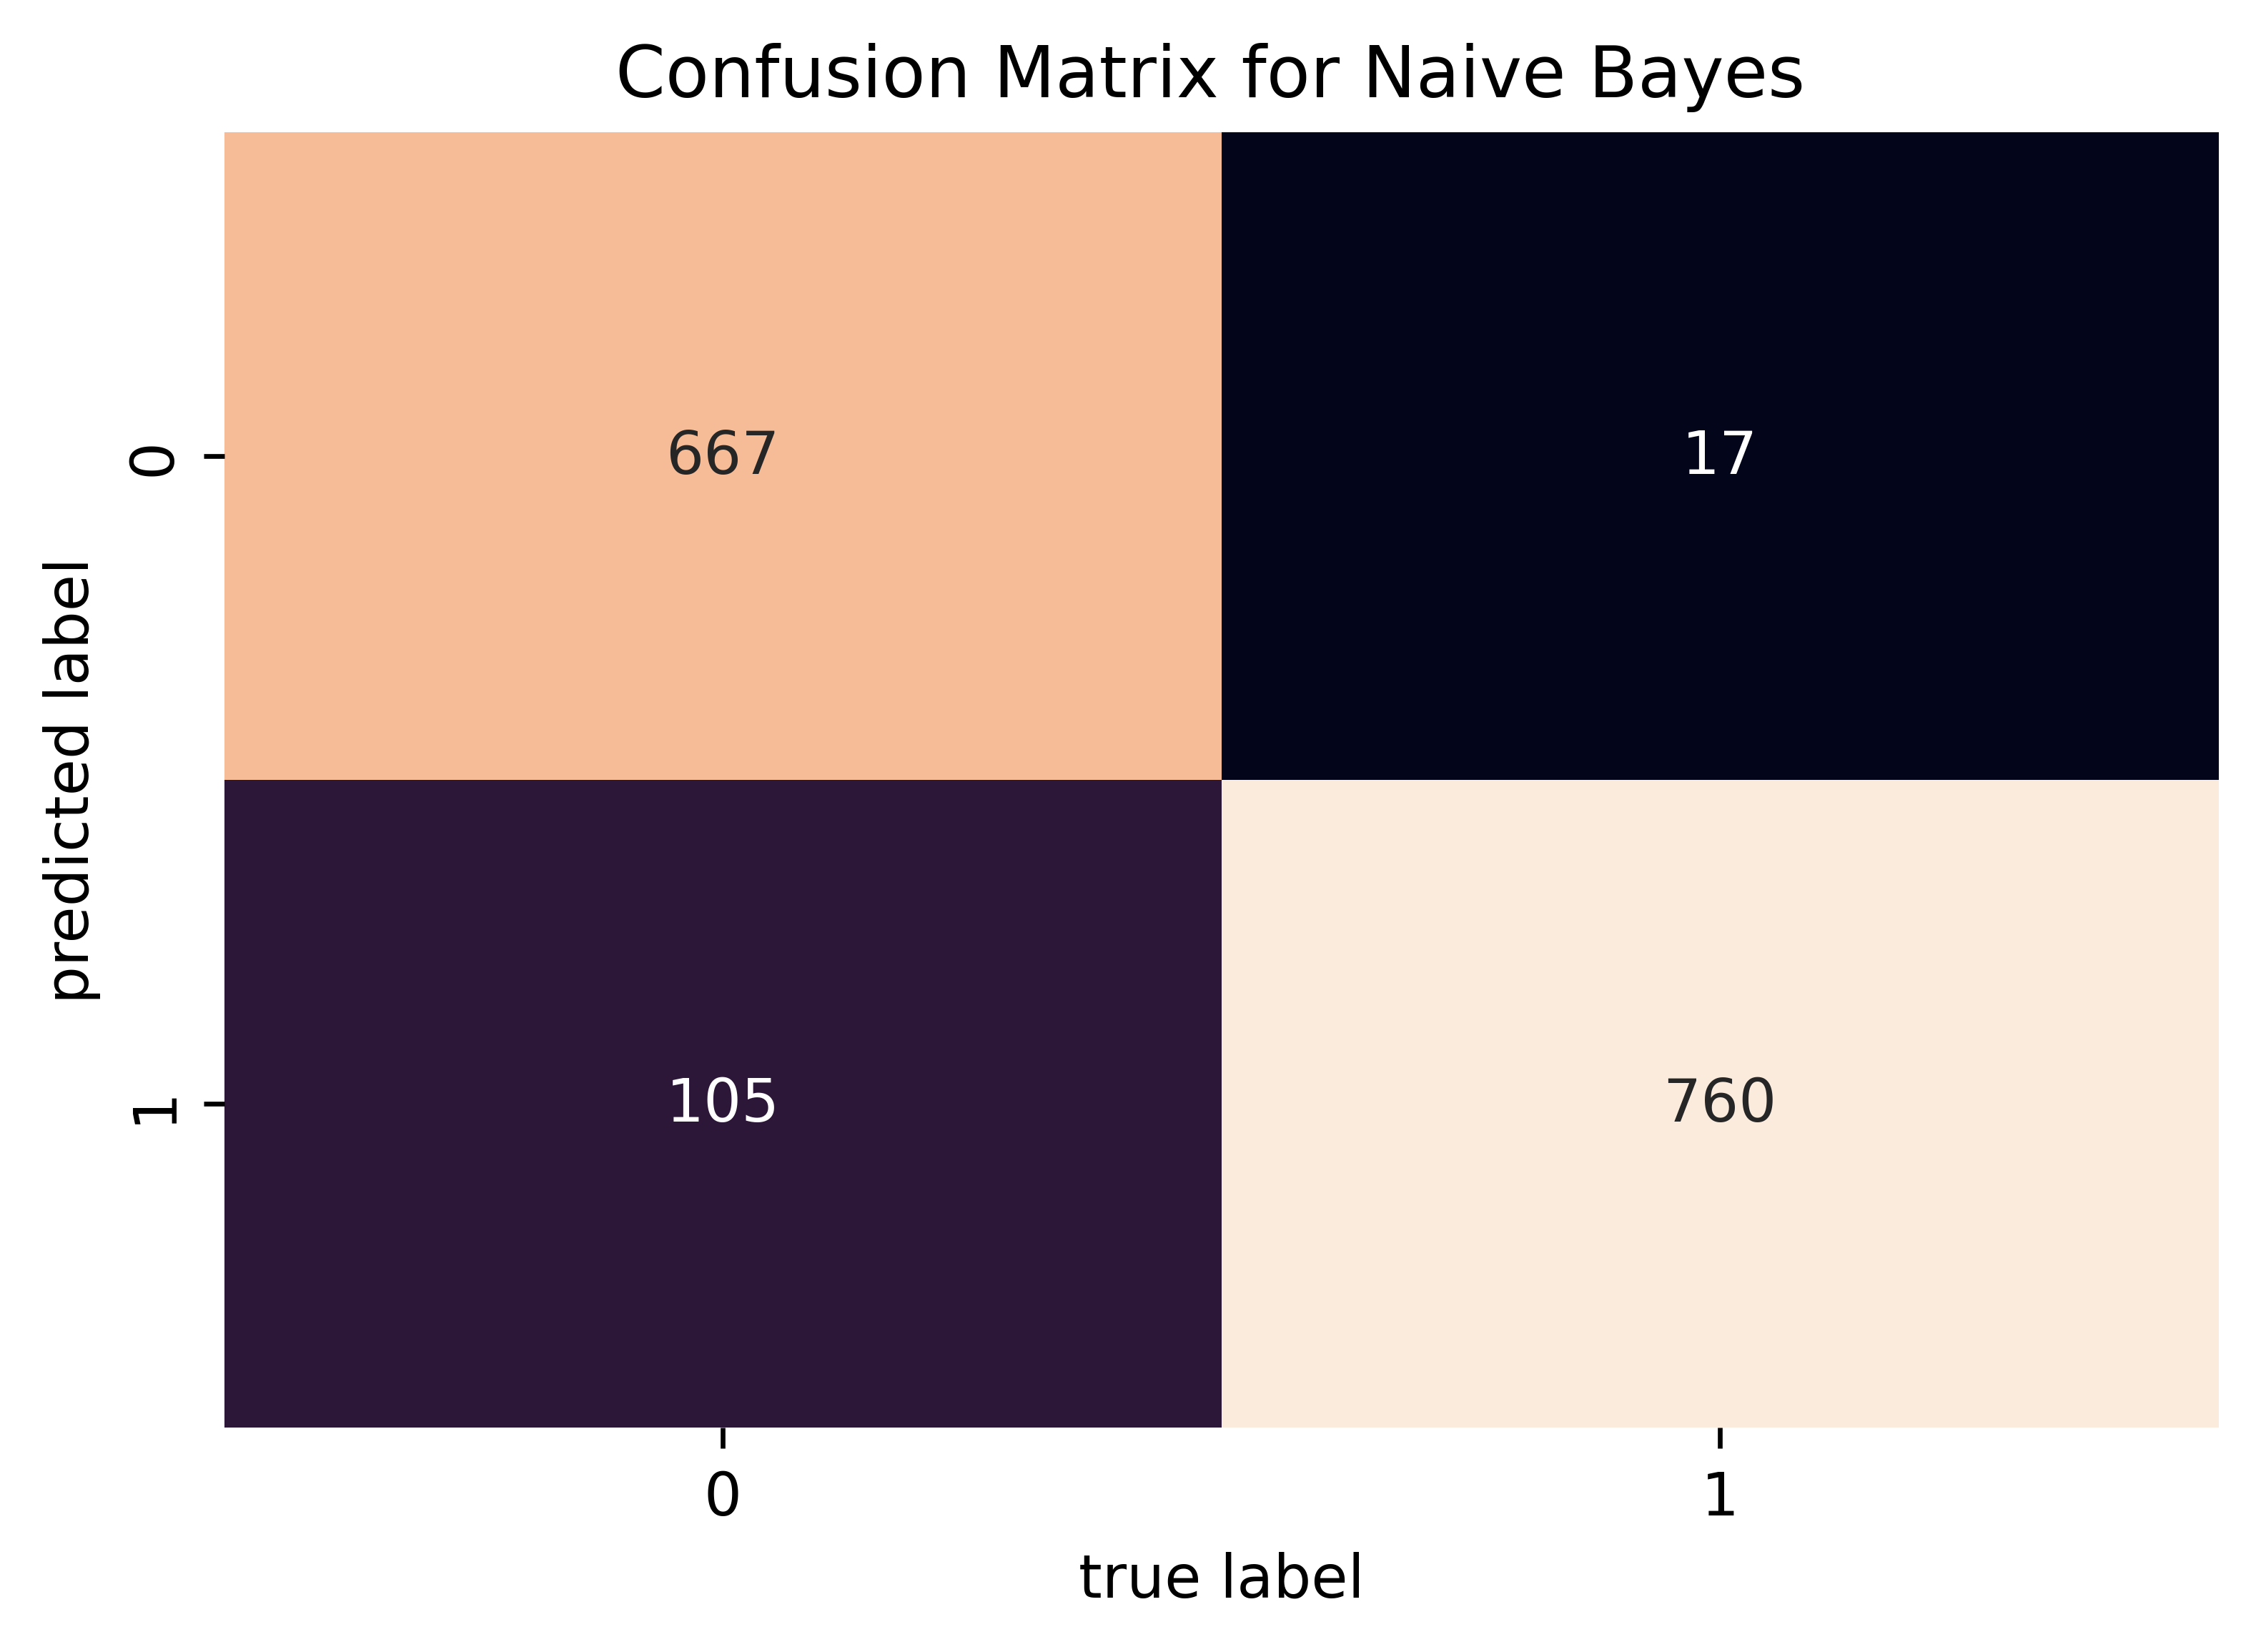

In [42]:
from sklearn.naive_bayes import GaussianNB

# Convert sparse matrix to dense numpy array
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_dense, y_train)

# Predict on test data
y_pred = nb.predict(X_test_dense)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {}".format(accuracy))
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1 Score: {}".format(f1))


plt.figure(dpi=600)
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes ')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix_naivebayes.png")
plt.show()

In [43]:
# from sklearn.svm import SVC


# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# # Train SVM model
# svm = SVC()
# svm.fit(X_train, y_train)

# # Predict on test data
# y_pred = svm.predict(X_test)

# # Evaluate model
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)

# print("Accuracy: {}".format(accuracy))
# print("Precision: {}".format(precision))
# print("Recall: {}".format(recall))
# print("F1 Score: {}".format(f1))

# cm = confusion_matrix(y_test, y_pred)
# print(cm)


Pipeline

In [44]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train_df['total']
Y_train = train_df['BinaryNumTarget']

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('vect', CountVectorizer()),  # add CountVectorizer step
    ('tfidf', TfidfTransformer()),  # add TfidfTransformer step
    ('clf', RandomForestClassifier())
])


In [46]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier())])

In [47]:
pipeline.predict(["Ciara Students no longer say the Pledge of Allegiance in schools Viral image,September 21, 2020"])

array([0], dtype=int64)

In [48]:
import joblib
#saving the pipeline

filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

['pipeline.sav']

In [49]:
filename = './pipeline.sav'

Prediction

In [50]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["Ciara Students no longer say the Pledge of Allegiance in schools Viral image,September 21, 2020"])
print(result) 

[0]
